In [1]:
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn import metrics
from sklearn.metrics import r2_score, mean_squared_error

#model linear
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import HuberRegressor
from sklearn.linear_model import BayesianRidge

#model nonlinear
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor

#model ensemble
from xgboost import XGBRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.kernel_ridge import KernelRidge

#model Neural Network
from tensorflow import keras
from sklearn.model_selection import KFold, GridSearchCV, StratifiedKFold
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')

2024-02-09 01:21:51.181806: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-02-09 01:21:51.181901: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-02-09 01:21:51.308599: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [2]:
df=pd.read_excel("/kaggle/input/drugs-data/2022_drugs_perez_dataset.xlsx")
df.head(10)

,Common_name,Molecular Weight (g/mol),pKa,Log P,Log S,Polar Surface Area (Å2),Polarizability (Å3),HOMO (eV),LUMO (eV),Ionization Energy (eV),Electron Affinity (eV),Electronegativity (eV),Hardness (eV),Electrophilicity (eV),ΔN_Fe,IE (%)
0,Caffeine,194.19,14.00,-0.07,-0.97,58.44,18.96,-5.769,-1.977,5.769,1.977,3.8730,1.8960,0.968250,0.824631,92.0
1,Acenocoumarol,353.3,4.70,1.98,-4.5,109.42,34.35,-6.399,-3.522,6.399,3.522,4.9605,1.4385,1.240125,0.708898,NaN
2,Acetaminophen,151.16,9.90,0.91,-1.6,49.33,15.52,-5.494,-1.646,5.494,1.646,3.5700,1.9240,0.892500,0.891372,85.8
3,Acetazolamide,222.3,8.80,-0.26,-2.36,115.04,19.16,-7.010,-3.358,7.010,3.358,5.1840,1.8260,1.296000,0.497262,93.0
4,Acetic acid,60.05,4.80,-0.17,1.22,37.3,5.34,-6.816,-1.070,6.816,1.070,3.9430,2.8730,0.985750,0.532022,92.0
5,Acepromazine,326.5,9.30,4.3,-4.5,25.2,37.17,-4.924,-2.529,4.924,2.529,3.7265,1.1975,0.931625,1.366806,NaN
6,Acetylmethadol,353.5,9.87,4.27,-5.3,29.54,40.82,-5.163,-1.485,5.163,1.485,3.3240,1.8390,0.831000,0.999456,NaN
7,Alphameprodine,275.4,9.10,3.46,-3.1,29.54,31.7,-5.284,-1.511,5.284,1.511,3.3975,1.8865,0.849375,0.954810,NaN
8,Alphaprodine,261.36,8.70,3.24,-2.7,29.54,29.83,-5.302,-1.501,5.302,1.501,3.4015,1.9005,0.850375,0.946725,NaN
9,Alprenolol,249.35,9.60,3.1,-3.1,41.49,29.38,-5.694,-1.455,5.694,1.455,3.5745,2.1195,0.893625,0.808092,NaN


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 260 entries, 0 to 259
Data columns (total 16 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Common_name               260 non-null    object 
 1   Molecular Weight (g/mol)  259 non-null    object 
 2   pKa                       260 non-null    float64
 3   Log P                     260 non-null    object 
 4   Log S                     256 non-null    object 
 5   Polar Surface Area (Å2)   260 non-null    object 
 6   Polarizability (Å3)       259 non-null    object 
 7   HOMO (eV)                 260 non-null    float64
 8   LUMO (eV)                 260 non-null    float64
 9   Ionization Energy (eV)    258 non-null    float64
 10  Electron Affinity (eV)    258 non-null    float64
 11  Electronegativity (eV)    258 non-null    float64
 12  Hardness  (eV)            258 non-null    float64
 13  Electrophilicity (eV)     260 non-null    float64
 14   ΔN_Fe    

In [4]:
# Remove commas and convert columns to floats
df['Molecular Weight (g/mol)'] = df['Molecular Weight (g/mol)'].replace(',', '', regex=True).astype(float)
df['Log P'] = df['Log P'].replace(',', '', regex=True).astype(float)
df['Log S'] = df['Log S'].replace(',', '', regex=True).astype(float)
df['Polar Surface Area (Å2)'] = df['Polar Surface Area (Å2)'].replace(',', '', regex=True).astype(float)
df['Polarizability (Å3)'] = df['Polarizability (Å3)'].replace(',', '', regex=True).astype(float)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 260 entries, 0 to 259
Data columns (total 16 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Common_name               260 non-null    object 
 1   Molecular Weight (g/mol)  259 non-null    float64
 2   pKa                       260 non-null    float64
 3   Log P                     260 non-null    float64
 4   Log S                     256 non-null    float64
 5   Polar Surface Area (Å2)   260 non-null    float64
 6   Polarizability (Å3)       259 non-null    float64
 7   HOMO (eV)                 260 non-null    float64
 8   LUMO (eV)                 260 non-null    float64
 9   Ionization Energy (eV)    258 non-null    float64
 10  Electron Affinity (eV)    258 non-null    float64
 11  Electronegativity (eV)    258 non-null    float64
 12  Hardness  (eV)            258 non-null    float64
 13  Electrophilicity (eV)     260 non-null    float64
 14   ΔN_Fe    

In [5]:
df.head(10)

,Common_name,Molecular Weight (g/mol),pKa,Log P,Log S,Polar Surface Area (Å2),Polarizability (Å3),HOMO (eV),LUMO (eV),Ionization Energy (eV),Electron Affinity (eV),Electronegativity (eV),Hardness (eV),Electrophilicity (eV),ΔN_Fe,IE (%)
0,Caffeine,194.19,14.00,-0.07,-0.97,58.44,18.96,-5.769,-1.977,5.769,1.977,3.8730,1.8960,0.968250,0.824631,92.0
1,Acenocoumarol,353.30,4.70,1.98,-4.50,109.42,34.35,-6.399,-3.522,6.399,3.522,4.9605,1.4385,1.240125,0.708898,NaN
2,Acetaminophen,151.16,9.90,0.91,-1.60,49.33,15.52,-5.494,-1.646,5.494,1.646,3.5700,1.9240,0.892500,0.891372,85.8
3,Acetazolamide,222.30,8.80,-0.26,-2.36,115.04,19.16,-7.010,-3.358,7.010,3.358,5.1840,1.8260,1.296000,0.497262,93.0
4,Acetic acid,60.05,4.80,-0.17,1.22,37.30,5.34,-6.816,-1.070,6.816,1.070,3.9430,2.8730,0.985750,0.532022,92.0
5,Acepromazine,326.50,9.30,4.30,-4.50,25.20,37.17,-4.924,-2.529,4.924,2.529,3.7265,1.1975,0.931625,1.366806,NaN
6,Acetylmethadol,353.50,9.87,4.27,-5.30,29.54,40.82,-5.163,-1.485,5.163,1.485,3.3240,1.8390,0.831000,0.999456,NaN
7,Alphameprodine,275.40,9.10,3.46,-3.10,29.54,31.70,-5.284,-1.511,5.284,1.511,3.3975,1.8865,0.849375,0.954810,NaN
8,Alphaprodine,261.36,8.70,3.24,-2.70,29.54,29.83,-5.302,-1.501,5.302,1.501,3.4015,1.9005,0.850375,0.946725,NaN
9,Alprenolol,249.35,9.60,3.10,-3.10,41.49,29.38,-5.694,-1.455,5.694,1.455,3.5745,2.1195,0.893625,0.808092,NaN


In [6]:
dnull=df.isna().sum()
tdnull=df.isna().sum().sum()

print("Data Null : \n",dnull)
print("Total Data Null : ",tdnull)

Data Null : 
 Common_name                   0
Molecular Weight (g/mol)      1
pKa                           0
Log P                         0
Log S                         4
Polar Surface Area (Å2)       0
Polarizability (Å3)           1
HOMO (eV)                     0
LUMO (eV)                     0
Ionization Energy (eV)        2
Electron Affinity (eV)        2
Electronegativity (eV)        2
Hardness  (eV)                2
Electrophilicity (eV)         0
 ΔN_Fe                        0
IE (%)                      178
dtype: int64
Total Data Null :  192


In [7]:
df=df.dropna()
tdnull=df.isna().sum().sum()

print("Total Data Null : ",tdnull)

df.info()

Total Data Null :  0
<class 'pandas.core.frame.DataFrame'>
Index: 78 entries, 0 to 259
Data columns (total 16 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Common_name               78 non-null     object 
 1   Molecular Weight (g/mol)  78 non-null     float64
 2   pKa                       78 non-null     float64
 3   Log P                     78 non-null     float64
 4   Log S                     78 non-null     float64
 5   Polar Surface Area (Å2)   78 non-null     float64
 6   Polarizability (Å3)       78 non-null     float64
 7   HOMO (eV)                 78 non-null     float64
 8   LUMO (eV)                 78 non-null     float64
 9   Ionization Energy (eV)    78 non-null     float64
 10  Electron Affinity (eV)    78 non-null     float64
 11  Electronegativity (eV)    78 non-null     float64
 12  Hardness  (eV)            78 non-null     float64
 13  Electrophilicity (eV)     78 non-null     float64


In [8]:
df=df.drop_duplicates()
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 70 entries, 0 to 259
Data columns (total 16 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Common_name               70 non-null     object 
 1   Molecular Weight (g/mol)  70 non-null     float64
 2   pKa                       70 non-null     float64
 3   Log P                     70 non-null     float64
 4   Log S                     70 non-null     float64
 5   Polar Surface Area (Å2)   70 non-null     float64
 6   Polarizability (Å3)       70 non-null     float64
 7   HOMO (eV)                 70 non-null     float64
 8   LUMO (eV)                 70 non-null     float64
 9   Ionization Energy (eV)    70 non-null     float64
 10  Electron Affinity (eV)    70 non-null     float64
 11  Electronegativity (eV)    70 non-null     float64
 12  Hardness  (eV)            70 non-null     float64
 13  Electrophilicity (eV)     70 non-null     float64
 14   ΔN_Fe          


Outliers using IQR Method:
           Common_name  Molecular Weight (g/mol)   pKa  Log P  Log S  \
11   Aminobenzoic acid                   13714.0  3.38   0.83   -0.4   
226         Rifampicin                     822.9  1.70   2.77   -4.3   

     Polar Surface Area (Å2)  Polarizability (Å3)  HOMO (eV)  LUMO (eV)  \
11                     63.32                13.44     -5.922     -2.122   
226                   220.15                86.46     -4.855     -2.808   

     Ionization Energy (eV)  Electron Affinity (eV)  Electronegativity (eV)  \
11                    5.922                   2.122                  4.0220   
226                   4.855                   2.808                  3.8315   

     Hardness  (eV)  Electrophilicity (eV)      ΔN_Fe   IE (%)  
11           1.9000                 1.005500  0.783684    80.0  
226          1.0235                 0.957875  1.547875    94.7  




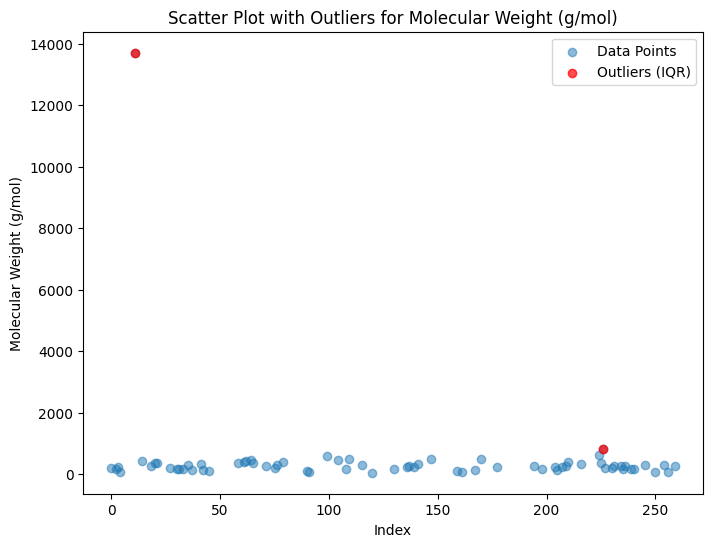

In [9]:
# Specify the column you want to analyze for outliers by index
column_index = 1

# Check if the specified column contains numeric data
column_name = df.columns[column_index]

# Method 2: IQR (Interquartile Range) Method
Q1 = df[column_name].quantile(0.25)
Q3 = df[column_name].quantile(0.75)
IQR = Q3 - Q1

# Define lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers based on the bounds
outliers_iqr = df[(df[column_name] < lower_bound) | (df[column_name] > upper_bound)]

print("\nOutliers using IQR Method:")
print(outliers_iqr)

print("\n")

# Create a scatter plot to visualize outliers
plt.figure(figsize=(8, 6))
plt.scatter(df.index, df[column_name], label='Data Points', alpha=0.5)
plt.scatter(outliers_iqr.index, outliers_iqr[column_name], color='red', label='Outliers (IQR)', alpha=0.7)
plt.title(f'Scatter Plot with Outliers for {column_name}')
plt.xlabel('Index')
plt.ylabel(column_name)
plt.legend()
plt.show()

df = df.drop(outliers_iqr.index) # data outlier drop


Outliers using IQR Method:
    Common_name  Molecular Weight (g/mol)    pKa  Log P  Log S  \
256     Glycine                     75.07  75.07  -3.21   0.87   

     Polar Surface Area (Å2)  Polarizability (Å3)  HOMO (eV)  LUMO (eV)  \
256                    63.32                 6.65     -6.339     -0.773   

     Ionization Energy (eV)  Electron Affinity (eV)  Electronegativity (eV)  \
256                   6.339                   0.773                   3.556   

     Hardness  (eV)  Electrophilicity (eV)      ΔN_Fe   IE (%)  
256           2.783                    0.889  0.618757    80.0  




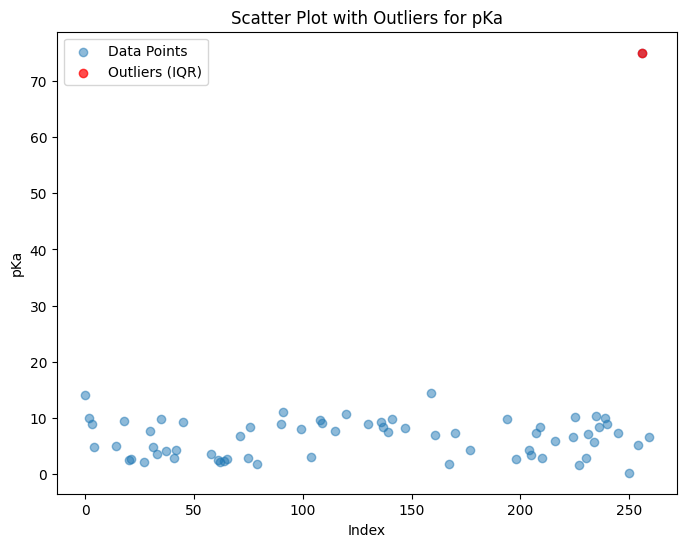

In [10]:
# Specify the column you want to analyze for outliers by index
column_index = 2

# Check if the specified column contains numeric data
column_name = df.columns[column_index]

# Method 2: IQR (Interquartile Range) Method
Q1 = df[column_name].quantile(0.25)
Q3 = df[column_name].quantile(0.75)
IQR = Q3 - Q1

# Define lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers based on the bounds
outliers_iqr = df[(df[column_name] < lower_bound) | (df[column_name] > upper_bound)]

print("\nOutliers using IQR Method:")
print(outliers_iqr)

print("\n")

# Create a scatter plot to visualize outliers
plt.figure(figsize=(8, 6))
plt.scatter(df.index, df[column_name], label='Data Points', alpha=0.5)
plt.scatter(outliers_iqr.index, outliers_iqr[column_name], color='red', label='Outliers (IQR)', alpha=0.7)
plt.title(f'Scatter Plot with Outliers for {column_name}')
plt.xlabel('Index')
plt.ylabel(column_name)
plt.legend()
plt.show()

df = df.drop(outliers_iqr.index) # data outlier drop


Outliers using IQR Method:
             Common_name  Molecular Weight (g/mol)  pKa  Log P  Log S  \
99   dihydrostreptomycin                     583.6  8.0   -8.2  -1.60   
170            Kanamycin                     484.5  7.2   -7.1  -0.72   

     Polar Surface Area (Å2)  Polarizability (Å3)  HOMO (eV)  LUMO (eV)  \
99                    334.59                56.06     -5.337      0.181   
170                   282.61                47.57     -5.852      4.514   

     Ionization Energy (eV)  Electron Affinity (eV)  Electronegativity (eV)  \
99                    5.337                  -0.181                   2.578   
170                   5.852                  -4.514                   0.669   

     Hardness  (eV)  Electrophilicity (eV)      ΔN_Fe   IE (%)  
99            2.759                  0.64450  0.801377   88.50  
170           5.183                  0.16725  0.610747   90.96  




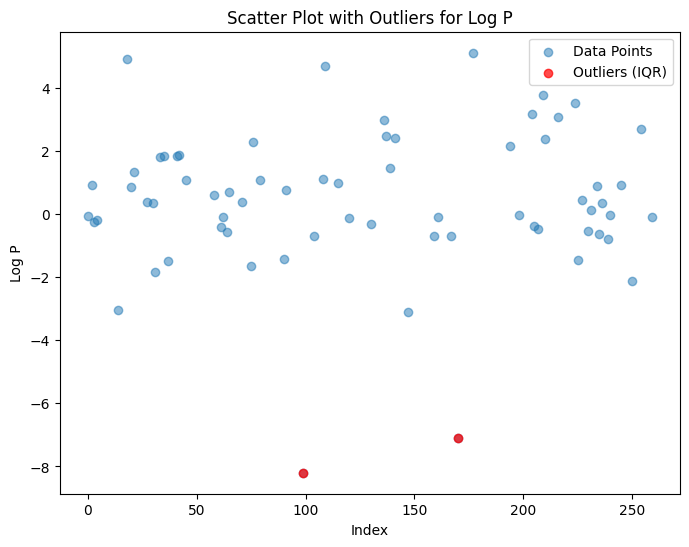

In [11]:
# Specify the column you want to analyze for outliers by index
column_index = 3

# Check if the specified column contains numeric data
column_name = df.columns[column_index]

# Method 2: IQR (Interquartile Range) Method
Q1 = df[column_name].quantile(0.25)
Q3 = df[column_name].quantile(0.75)
IQR = Q3 - Q1

# Define lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers based on the bounds
outliers_iqr = df[(df[column_name] < lower_bound) | (df[column_name] > upper_bound)]

print("\nOutliers using IQR Method:")
print(outliers_iqr)

print("\n")

# Create a scatter plot to visualize outliers
plt.figure(figsize=(8, 6))
plt.scatter(df.index, df[column_name], label='Data Points', alpha=0.5)
plt.scatter(outliers_iqr.index, outliers_iqr[column_name], color='red', label='Outliers (IQR)', alpha=0.7)
plt.title(f'Scatter Plot with Outliers for {column_name}')
plt.xlabel('Index')
plt.ylabel(column_name)
plt.legend()
plt.show()

df = df.drop(outliers_iqr.index) # data outlier drop


Outliers using IQR Method:
          Common_name  Molecular Weight (g/mol)  pKa  Log P  Log S  \
234  Sulfamethoxazole                    253.28  5.6   0.89   2.62   

     Polar Surface Area (Å2)  Polarizability (Å3)  HOMO (eV)  LUMO (eV)  \
234                    98.22                24.99     -6.175     -2.495   

     Ionization Energy (eV)  Electron Affinity (eV)  Electronegativity (eV)  \
234                   6.175                   2.495                   4.335   

     Hardness  (eV)  Electrophilicity (eV)      ΔN_Fe   IE (%)  
234            1.84                  1.08375  0.724185    91.6  




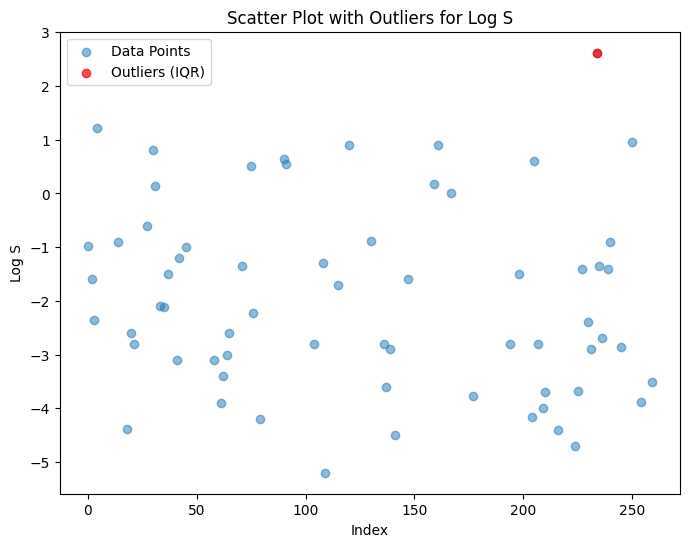

In [12]:
# Specify the column you want to analyze for outliers by index
column_index = 4

# Check if the specified column contains numeric data
column_name = df.columns[column_index]

# Method 2: IQR (Interquartile Range) Method
Q1 = df[column_name].quantile(0.25)
Q3 = df[column_name].quantile(0.75)
IQR = Q3 - Q1

# Define lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers based on the bounds
outliers_iqr = df[(df[column_name] < lower_bound) | (df[column_name] > upper_bound)]

print("\nOutliers using IQR Method:")
print(outliers_iqr)

print("\n")

# Create a scatter plot to visualize outliers
plt.figure(figsize=(8, 6))
plt.scatter(df.index, df[column_name], label='Data Points', alpha=0.5)
plt.scatter(outliers_iqr.index, outliers_iqr[column_name], color='red', label='Outliers (IQR)', alpha=0.7)
plt.title(f'Scatter Plot with Outliers for {column_name}')
plt.xlabel('Index')
plt.ylabel(column_name)
plt.legend()
plt.show()

df = df.drop(outliers_iqr.index) # data outlier drop


Outliers using IQR Method:
     Common_name  Molecular Weight (g/mol)  pKa  Log P  Log S  \
147  Gentamicina                     477.6  8.2   -3.1   -1.6   

     Polar Surface Area (Å2)  Polarizability (Å3)  HOMO (eV)  LUMO (eV)  \
147                   199.73                51.92     -5.503      4.859   

     Ionization Energy (eV)  Electron Affinity (eV)  Electronegativity (eV)  \
147                   5.503                  -4.859                   0.322   

     Hardness  (eV)  Electrophilicity (eV)     ΔN_Fe   IE (%)  
147           5.181                   0.0805  0.64447   84.65  




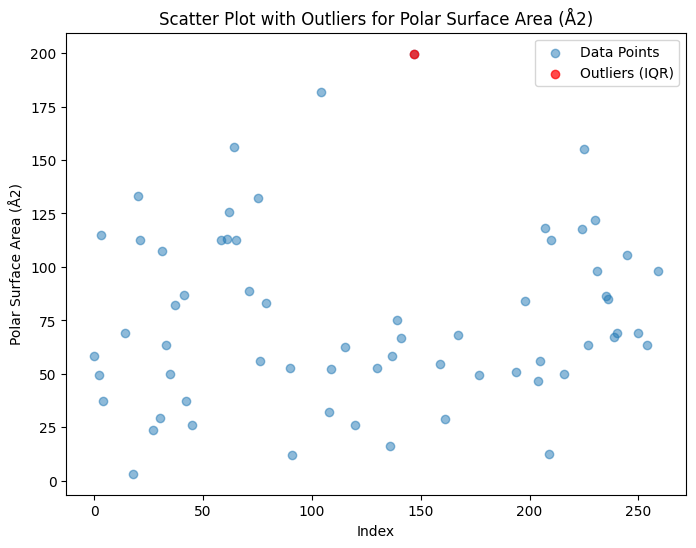

In [13]:
# Specify the column you want to analyze for outliers by index
column_index = 5

# Check if the specified column contains numeric data
column_name = df.columns[column_index]

# Method 2: IQR (Interquartile Range) Method
Q1 = df[column_name].quantile(0.25)
Q3 = df[column_name].quantile(0.75)
IQR = Q3 - Q1

# Define lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers based on the bounds
outliers_iqr = df[(df[column_name] < lower_bound) | (df[column_name] > upper_bound)]

print("\nOutliers using IQR Method:")
print(outliers_iqr)

print("\n")

# Create a scatter plot to visualize outliers
plt.figure(figsize=(8, 6))
plt.scatter(df.index, df[column_name], label='Data Points', alpha=0.5)
plt.scatter(outliers_iqr.index, outliers_iqr[column_name], color='red', label='Outliers (IQR)', alpha=0.7)
plt.title(f'Scatter Plot with Outliers for {column_name}')
plt.xlabel('Index')
plt.ylabel(column_name)
plt.legend()
plt.show()

df = df.drop(outliers_iqr.index) # data outlier drop


Outliers using IQR Method:
    Common_name  Molecular Weight (g/mol)  pKa  Log P  Log S  \
224   Reserpine                     608.7  6.6   3.53   -4.7   

     Polar Surface Area (Å2)  Polarizability (Å3)  HOMO (eV)  LUMO (eV)  \
224                   117.78                66.06     -4.905     -2.329   

     Ionization Energy (eV)  Electron Affinity (eV)  Electronegativity (eV)  \
224                   4.905                   2.329                   3.617   

     Hardness  (eV)  Electrophilicity (eV)      ΔN_Fe   IE (%)  
224           1.288                  0.90425  1.313276    94.0  




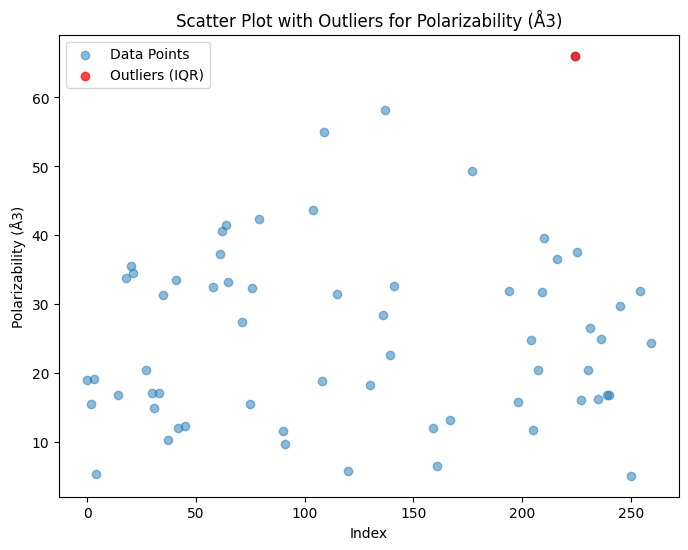

In [14]:
# Specify the column you want to analyze for outliers by index
column_index = 6

# Check if the specified column contains numeric data
column_name = df.columns[column_index]

# Method 2: IQR (Interquartile Range) Method
Q1 = df[column_name].quantile(0.25)
Q3 = df[column_name].quantile(0.75)
IQR = Q3 - Q1

# Define lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers based on the bounds
outliers_iqr = df[(df[column_name] < lower_bound) | (df[column_name] > upper_bound)]

print("\nOutliers using IQR Method:")
print(outliers_iqr)

print("\n")

# Create a scatter plot to visualize outliers
plt.figure(figsize=(8, 6))
plt.scatter(df.index, df[column_name], label='Data Points', alpha=0.5)
plt.scatter(outliers_iqr.index, outliers_iqr[column_name], color='red', label='Outliers (IQR)', alpha=0.7)
plt.title(f'Scatter Plot with Outliers for {column_name}')
plt.xlabel('Index')
plt.ylabel(column_name)
plt.legend()
plt.show()

df = df.drop(outliers_iqr.index) # data outlier drop


Outliers using IQR Method:
      Common_name  Molecular Weight (g/mol)  pKa  Log P  Log S  \
259  Sulfadiazine                    250.28  6.5  -0.09  -3.51   

     Polar Surface Area (Å2)  Polarizability (Å3)  HOMO (eV)  LUMO (eV)  \
259                    97.97                24.39     -4.165     -2.126   

     Ionization Energy (eV)  Electron Affinity (eV)  Electronegativity (eV)  \
259                   4.165                   2.126                  3.1455   

     Hardness  (eV)  Electrophilicity (eV)      ΔN_Fe   IE (%)  
259          1.0195                 0.786375  1.890387    94.0  




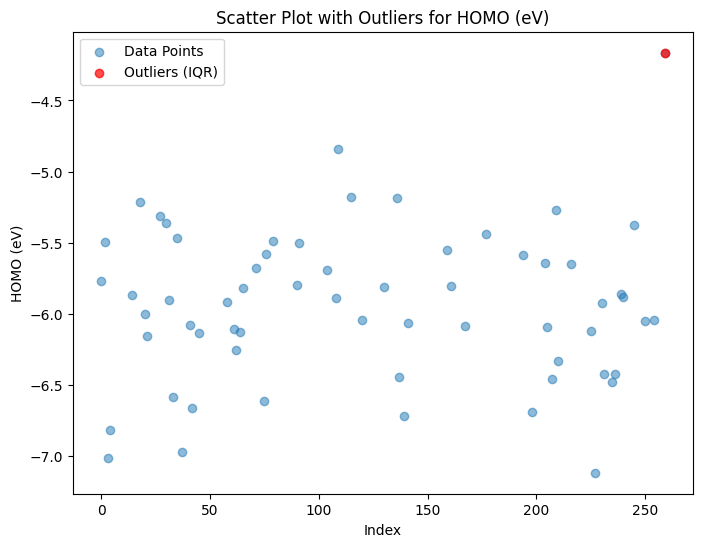

In [15]:
# Specify the column you want to analyze for outliers by index
column_index = 7

# Check if the specified column contains numeric data
column_name = df.columns[column_index]

# Method 2: IQR (Interquartile Range) Method
Q1 = df[column_name].quantile(0.25)
Q3 = df[column_name].quantile(0.75)
IQR = Q3 - Q1

# Define lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers based on the bounds
outliers_iqr = df[(df[column_name] < lower_bound) | (df[column_name] > upper_bound)]

print("\nOutliers using IQR Method:")
print(outliers_iqr)

print("\n")

# Create a scatter plot to visualize outliers
plt.figure(figsize=(8, 6))
plt.scatter(df.index, df[column_name], label='Data Points', alpha=0.5)
plt.scatter(outliers_iqr.index, outliers_iqr[column_name], color='red', label='Outliers (IQR)', alpha=0.7)
plt.title(f'Scatter Plot with Outliers for {column_name}')
plt.xlabel('Index')
plt.ylabel(column_name)
plt.legend()
plt.show()

df = df.drop(outliers_iqr.index) # data outlier drop


Outliers using IQR Method:
        Common_name  Molecular Weight (g/mol)   pKa  Log P  Log S  \
90   Diethanolamine                   105.140   8.9  -1.43   0.65   
91     Diethylamine                    73.140  11.0   0.76   0.54   
120      Ethylamine                    45.080  10.7  -0.13   0.90   
250            Urea                    60.056   0.2  -2.11   0.96   

     Polar Surface Area (Å2)  Polarizability (Å3)  HOMO (eV)  LUMO (eV)  \
90                     52.49                11.63     -5.798      6.520   
91                     12.03                 9.72     -5.505      6.840   
120                    26.00                 5.75     -6.042      7.222   
250                    69.11                 5.10     -6.050      0.332   

     Ionization Energy (eV)  Electron Affinity (eV)  Electronegativity (eV)  \
90                    5.798                  -6.520                 -0.3610   
91                    5.505                  -6.840                 -0.6675   
120          

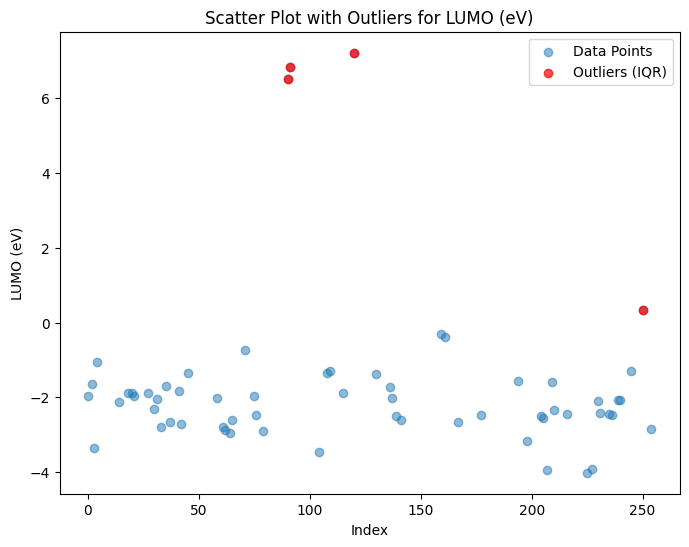

In [16]:
# Specify the column you want to analyze for outliers by index
column_index = 8

# Check if the specified column contains numeric data
column_name = df.columns[column_index]

# Method 2: IQR (Interquartile Range) Method
Q1 = df[column_name].quantile(0.25)
Q3 = df[column_name].quantile(0.75)
IQR = Q3 - Q1

# Define lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers based on the bounds
outliers_iqr = df[(df[column_name] < lower_bound) | (df[column_name] > upper_bound)]

print("\nOutliers using IQR Method:")
print(outliers_iqr)

print("\n")

# Create a scatter plot to visualize outliers
plt.figure(figsize=(8, 6))
plt.scatter(df.index, df[column_name], label='Data Points', alpha=0.5)
plt.scatter(outliers_iqr.index, outliers_iqr[column_name], color='red', label='Outliers (IQR)', alpha=0.7)
plt.title(f'Scatter Plot with Outliers for {column_name}')
plt.xlabel('Index')
plt.ylabel(column_name)
plt.legend()
plt.show()

df = df.drop(outliers_iqr.index) # data outlier drop


Outliers using IQR Method:
Empty DataFrame
Columns: [Common_name, Molecular Weight (g/mol), pKa, Log P, Log S, Polar Surface Area (Å2), Polarizability (Å3), HOMO (eV), LUMO (eV), Ionization Energy (eV), Electron Affinity (eV), Electronegativity (eV), Hardness  (eV), Electrophilicity (eV)  ,  ΔN_Fe , IE (%)]
Index: []




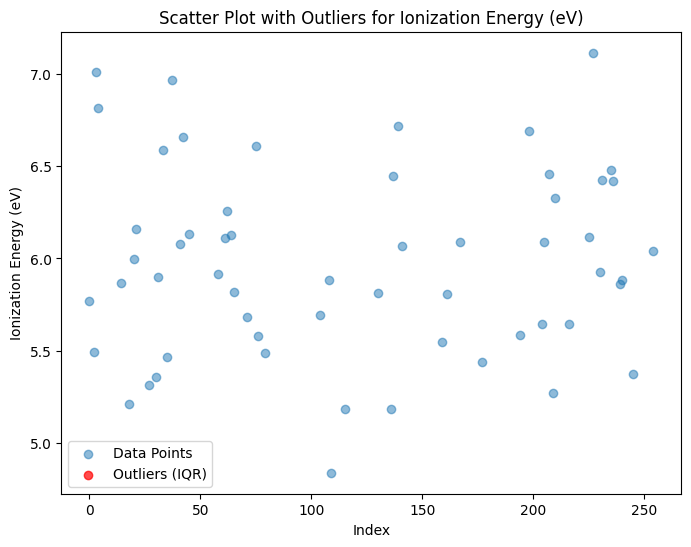

In [17]:
# Specify the column you want to analyze for outliers by index
column_index = 9

# Check if the specified column contains numeric data
column_name = df.columns[column_index]

# Method 2: IQR (Interquartile Range) Method
Q1 = df[column_name].quantile(0.25)
Q3 = df[column_name].quantile(0.75)
IQR = Q3 - Q1

# Define lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers based on the bounds
outliers_iqr = df[(df[column_name] < lower_bound) | (df[column_name] > upper_bound)]

print("\nOutliers using IQR Method:")
print(outliers_iqr)

print("\n")

# Create a scatter plot to visualize outliers
plt.figure(figsize=(8, 6))
plt.scatter(df.index, df[column_name], label='Data Points', alpha=0.5)
plt.scatter(outliers_iqr.index, outliers_iqr[column_name], color='red', label='Outliers (IQR)', alpha=0.7)
plt.title(f'Scatter Plot with Outliers for {column_name}')
plt.xlabel('Index')
plt.ylabel(column_name)
plt.legend()
plt.show()

df = df.drop(outliers_iqr.index) # data outlier drop


Outliers using IQR Method:
        Common_name  Molecular Weight (g/mol)    pKa  Log P  Log S  \
159       Histamine                  111.1451  14.46  -0.70   0.18   
161       Imidazole                   68.0800   7.00  -0.08   0.90   
207  Nitrofurantoin                  238.1600   7.20  -0.47  -2.80   
225      Riboflavin                  376.4000  10.20  -1.46  -3.68   
227       Saccharin                  183.1900   1.60   0.45  -1.40   

     Polar Surface Area (Å2)  Polarizability (Å3)  HOMO (eV)  LUMO (eV)  \
159                    54.70                12.08     -5.549     -0.315   
161                    28.68                 6.56     -5.805     -0.375   
207                   118.05                20.49     -6.456     -3.951   
225                   155.05                37.50     -6.119     -4.021   
227                    63.24                16.02     -7.116     -3.929   

     Ionization Energy (eV)  Electron Affinity (eV)  Electronegativity (eV)  \
159                  

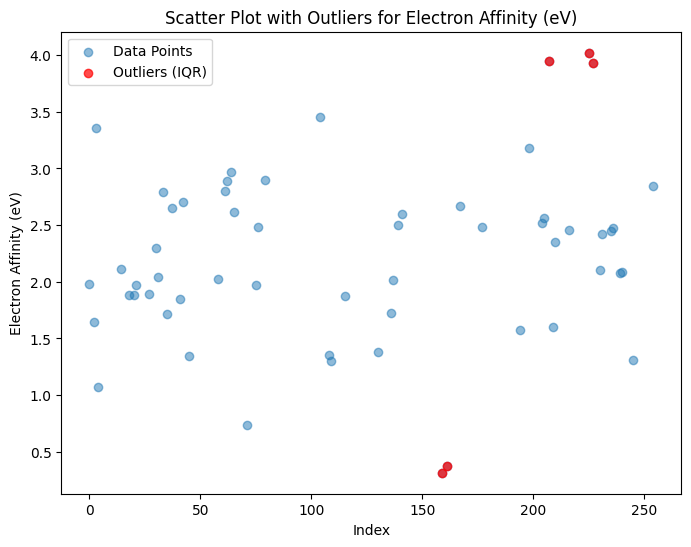

In [18]:
# Specify the column you want to analyze for outliers by index
column_index = 10

# Check if the specified column contains numeric data
column_name = df.columns[column_index]

# Method 2: IQR (Interquartile Range) Method
Q1 = df[column_name].quantile(0.25)
Q3 = df[column_name].quantile(0.75)
IQR = Q3 - Q1

# Define lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers based on the bounds
outliers_iqr = df[(df[column_name] < lower_bound) | (df[column_name] > upper_bound)]

print("\nOutliers using IQR Method:")
print(outliers_iqr)

print("\n")

# Create a scatter plot to visualize outliers
plt.figure(figsize=(8, 6))
plt.scatter(df.index, df[column_name], label='Data Points', alpha=0.5)
plt.scatter(outliers_iqr.index, outliers_iqr[column_name], color='red', label='Outliers (IQR)', alpha=0.7)
plt.title(f'Scatter Plot with Outliers for {column_name}')
plt.xlabel('Index')
plt.ylabel(column_name)
plt.legend()
plt.show()

df = df.drop(outliers_iqr.index) # data outlier drop


Outliers using IQR Method:
Empty DataFrame
Columns: [Common_name, Molecular Weight (g/mol), pKa, Log P, Log S, Polar Surface Area (Å2), Polarizability (Å3), HOMO (eV), LUMO (eV), Ionization Energy (eV), Electron Affinity (eV), Electronegativity (eV), Hardness  (eV), Electrophilicity (eV)  ,  ΔN_Fe , IE (%)]
Index: []




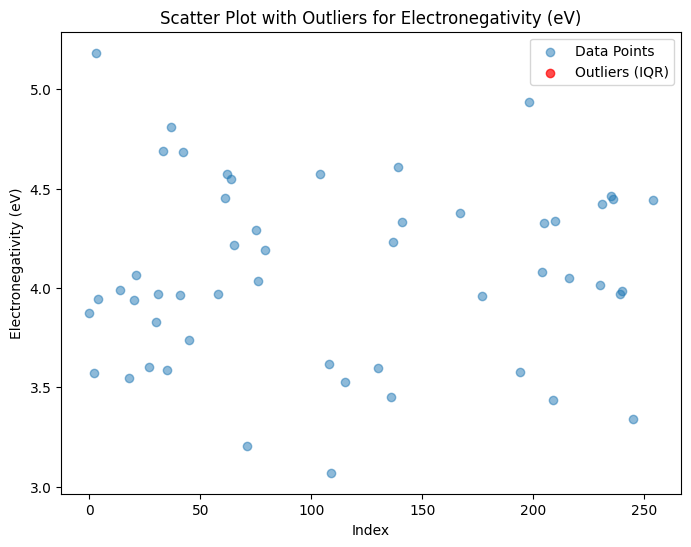

In [19]:
# Specify the column you want to analyze for outliers by index
column_index = 11

# Check if the specified column contains numeric data
column_name = df.columns[column_index]

# Method 2: IQR (Interquartile Range) Method
Q1 = df[column_name].quantile(0.25)
Q3 = df[column_name].quantile(0.75)
IQR = Q3 - Q1

# Define lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers based on the bounds
outliers_iqr = df[(df[column_name] < lower_bound) | (df[column_name] > upper_bound)]

print("\nOutliers using IQR Method:")
print(outliers_iqr)

print("\n")

# Create a scatter plot to visualize outliers
plt.figure(figsize=(8, 6))
plt.scatter(df.index, df[column_name], label='Data Points', alpha=0.5)
plt.scatter(outliers_iqr.index, outliers_iqr[column_name], color='red', label='Outliers (IQR)', alpha=0.7)
plt.title(f'Scatter Plot with Outliers for {column_name}')
plt.xlabel('Index')
plt.ylabel(column_name)
plt.legend()
plt.show()

df = df.drop(outliers_iqr.index) # data outlier drop


Outliers using IQR Method:
      Common_name  Molecular Weight (g/mol)   pKa  Log P  Log S  \
4    Acetic acid                      60.05  4.80  -0.17   1.22   
104   Doxycycline                    444.40  3.09  -0.70  -2.80   

     Polar Surface Area (Å2)  Polarizability (Å3)  HOMO (eV)  LUMO (eV)  \
4                       37.3                 5.34     -6.816     -1.070   
104                    182.0                43.65     -5.693     -3.454   

     Ionization Energy (eV)  Electron Affinity (eV)  Electronegativity (eV)  \
4                     6.816                   1.070                  3.9430   
104                   5.693                   3.454                  4.5735   

     Hardness  (eV)  Electrophilicity (eV)      ΔN_Fe   IE (%)  
4            2.8730                 0.985750  0.532022    92.0  
104          1.1195                 1.143375  1.083743    95.9  




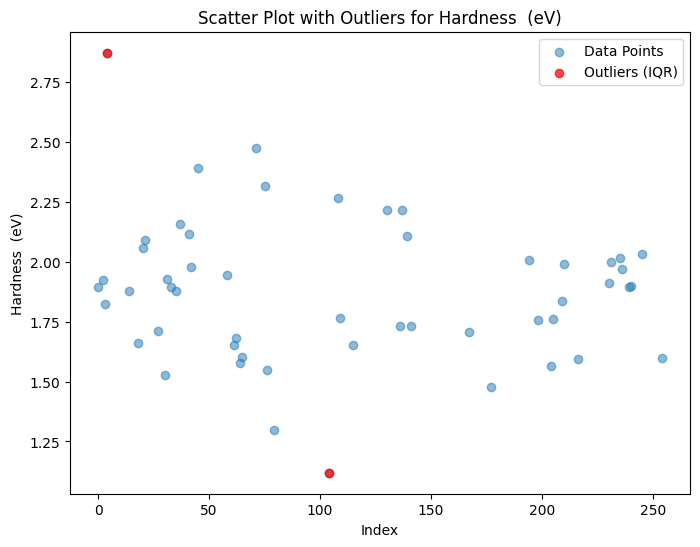

In [20]:
# Specify the column you want to analyze for outliers by index
column_index = 12

# Check if the specified column contains numeric data
column_name = df.columns[column_index]

# Method 2: IQR (Interquartile Range) Method
Q1 = df[column_name].quantile(0.25)
Q3 = df[column_name].quantile(0.75)
IQR = Q3 - Q1

# Define lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers based on the bounds
outliers_iqr = df[(df[column_name] < lower_bound) | (df[column_name] > upper_bound)]

print("\nOutliers using IQR Method:")
print(outliers_iqr)

print("\n")

# Create a scatter plot to visualize outliers
plt.figure(figsize=(8, 6))
plt.scatter(df.index, df[column_name], label='Data Points', alpha=0.5)
plt.scatter(outliers_iqr.index, outliers_iqr[column_name], color='red', label='Outliers (IQR)', alpha=0.7)
plt.title(f'Scatter Plot with Outliers for {column_name}')
plt.xlabel('Index')
plt.ylabel(column_name)
plt.legend()
plt.show()

df = df.drop(outliers_iqr.index) # data outlier drop


Outliers using IQR Method:
Empty DataFrame
Columns: [Common_name, Molecular Weight (g/mol), pKa, Log P, Log S, Polar Surface Area (Å2), Polarizability (Å3), HOMO (eV), LUMO (eV), Ionization Energy (eV), Electron Affinity (eV), Electronegativity (eV), Hardness  (eV), Electrophilicity (eV)  ,  ΔN_Fe , IE (%)]
Index: []




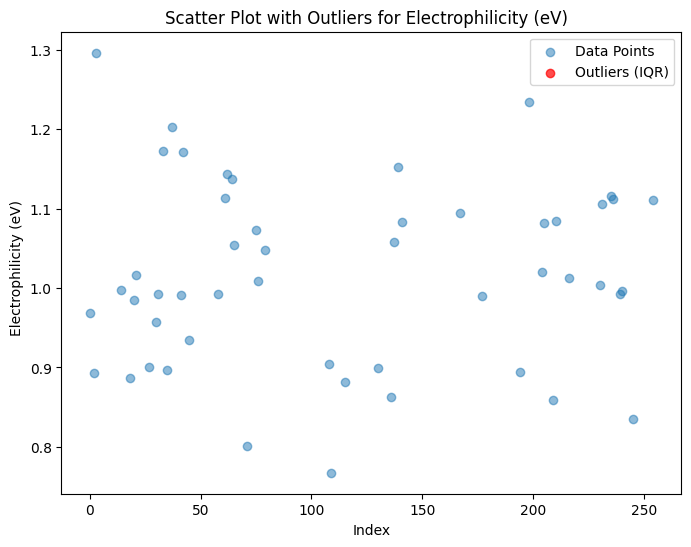

In [21]:
# Specify the column you want to analyze for outliers by index
column_index = 13

# Check if the specified column contains numeric data
column_name = df.columns[column_index]

# Method 2: IQR (Interquartile Range) Method
Q1 = df[column_name].quantile(0.25)
Q3 = df[column_name].quantile(0.75)
IQR = Q3 - Q1

# Define lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers based on the bounds
outliers_iqr = df[(df[column_name] < lower_bound) | (df[column_name] > upper_bound)]

print("\nOutliers using IQR Method:")
print(outliers_iqr)

print("\n")

# Create a scatter plot to visualize outliers
plt.figure(figsize=(8, 6))
plt.scatter(df.index, df[column_name], label='Data Points', alpha=0.5)
plt.scatter(outliers_iqr.index, outliers_iqr[column_name], color='red', label='Outliers (IQR)', alpha=0.7)
plt.title(f'Scatter Plot with Outliers for {column_name}')
plt.xlabel('Index')
plt.ylabel(column_name)
plt.legend()
plt.show()

df = df.drop(outliers_iqr.index) # data outlier drop


Outliers using IQR Method:
Empty DataFrame
Columns: [Common_name, Molecular Weight (g/mol), pKa, Log P, Log S, Polar Surface Area (Å2), Polarizability (Å3), HOMO (eV), LUMO (eV), Ionization Energy (eV), Electron Affinity (eV), Electronegativity (eV), Hardness  (eV), Electrophilicity (eV)  ,  ΔN_Fe , IE (%)]
Index: []




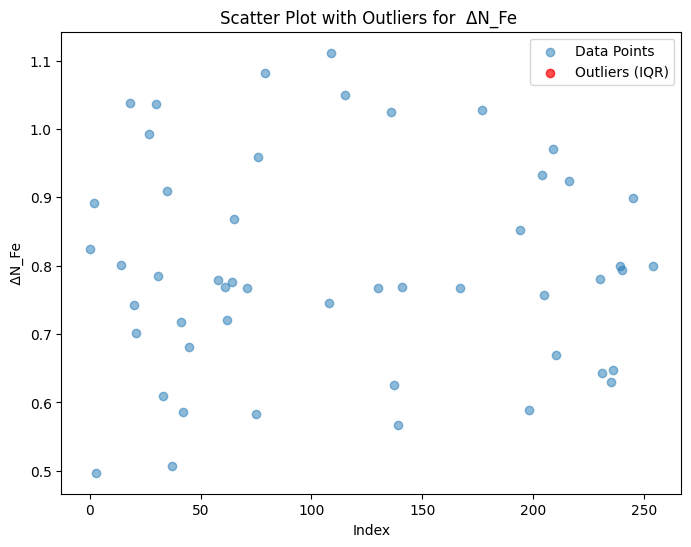

In [22]:
# Specify the column you want to analyze for outliers by index
column_index = 14

# Check if the specified column contains numeric data
column_name = df.columns[column_index]

# Method 2: IQR (Interquartile Range) Method
Q1 = df[column_name].quantile(0.25)
Q3 = df[column_name].quantile(0.75)
IQR = Q3 - Q1

# Define lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers based on the bounds
outliers_iqr = df[(df[column_name] < lower_bound) | (df[column_name] > upper_bound)]

print("\nOutliers using IQR Method:")
print(outliers_iqr)

print("\n")

# Create a scatter plot to visualize outliers
plt.figure(figsize=(8, 6))
plt.scatter(df.index, df[column_name], label='Data Points', alpha=0.5)
plt.scatter(outliers_iqr.index, outliers_iqr[column_name], color='red', label='Outliers (IQR)', alpha=0.7)
plt.title(f'Scatter Plot with Outliers for {column_name}')
plt.xlabel('Index')
plt.ylabel(column_name)
plt.legend()
plt.show()

df = df.drop(outliers_iqr.index) # data outlier drop


Outliers using IQR Method:
        Common_name  Molecular Weight (g/mol)  pKa  Log P  Log S  \
230  Sulfaguanidine                    214.25  2.8  -0.52   -2.4   

     Polar Surface Area (Å2)  Polarizability (Å3)  HOMO (eV)  LUMO (eV)  \
230                   122.06                20.38     -5.926     -2.103   

     Ionization Energy (eV)  Electron Affinity (eV)  Electronegativity (eV)  \
230                   5.926                   2.103                  4.0145   

     Hardness  (eV)  Electrophilicity (eV)      ΔN_Fe   IE (%)  
230          1.9115                 1.003625  0.780931    67.7  




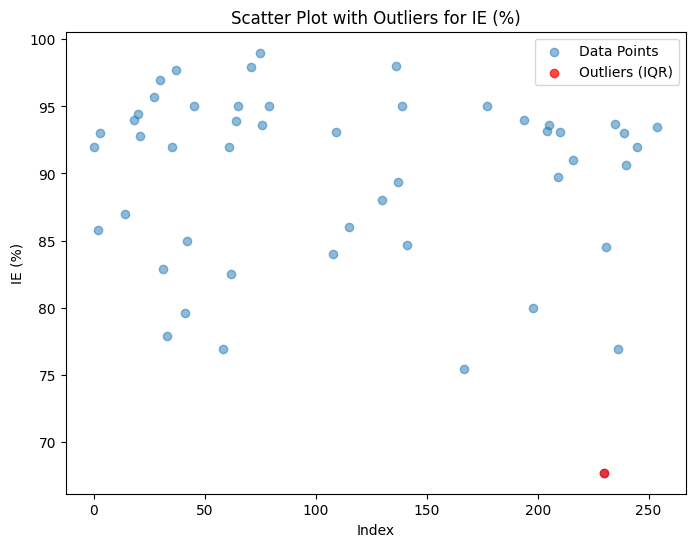

In [23]:
# Specify the column you want to analyze for outliers by index
column_index = 15

# Check if the specified column contains numeric data
column_name = df.columns[column_index]

# Method 2: IQR (Interquartile Range) Method
Q1 = df[column_name].quantile(0.25)
Q3 = df[column_name].quantile(0.75)
IQR = Q3 - Q1

# Define lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers based on the bounds
outliers_iqr = df[(df[column_name] < lower_bound) | (df[column_name] > upper_bound)]

print("\nOutliers using IQR Method:")
print(outliers_iqr)

print("\n")

# Create a scatter plot to visualize outliers
plt.figure(figsize=(8, 6))
plt.scatter(df.index, df[column_name], label='Data Points', alpha=0.5)
plt.scatter(outliers_iqr.index, outliers_iqr[column_name], color='red', label='Outliers (IQR)', alpha=0.7)
plt.title(f'Scatter Plot with Outliers for {column_name}')
plt.xlabel('Index')
plt.ylabel(column_name)
plt.legend()
plt.show()

df = df.drop(outliers_iqr.index) # data outlier drop

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 49 entries, 0 to 254
Data columns (total 16 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Common_name               49 non-null     object 
 1   Molecular Weight (g/mol)  49 non-null     float64
 2   pKa                       49 non-null     float64
 3   Log P                     49 non-null     float64
 4   Log S                     49 non-null     float64
 5   Polar Surface Area (Å2)   49 non-null     float64
 6   Polarizability (Å3)       49 non-null     float64
 7   HOMO (eV)                 49 non-null     float64
 8   LUMO (eV)                 49 non-null     float64
 9   Ionization Energy (eV)    49 non-null     float64
 10  Electron Affinity (eV)    49 non-null     float64
 11  Electronegativity (eV)    49 non-null     float64
 12  Hardness  (eV)            49 non-null     float64
 13  Electrophilicity (eV)     49 non-null     float64
 14   ΔN_Fe          

In [25]:
X=df.iloc[:,1:15]
y=df.iloc[:,15]

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.5, random_state=42)

In [27]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [28]:
reg = LinearRegression() 
start = datetime.now()
reg.fit(X_train, y_train)
pred = reg.predict(X_test)
stop = datetime.now()
delta = stop - start

print('Linear Regression\n')
r2 = r2_score(y_test, pred)
print('R2: ', r2)
err = np.sqrt(mean_squared_error(y_test, pred))
print('Root Mean Squared Error: ', err)
seconds = delta.seconds + delta.microseconds/1E6
print('Time to compute: ', seconds, 'seconds')

linear_reg = ('Linear Regression', r2, err, seconds)

Linear Regression

R2:  -7.981758323630567
Root Mean Squared Error:  19.47087444599421
Time to compute:  0.008215 seconds


In [ ]:

params = {
          'n_estimators': [300, 400, 500, 600, 700, 800],
          'max_features': [0.90, 0.92, 0.95, 1.0],
          'bootstrap': [True, False],
          'bootstrap_features': [True, False] }
    

bagging_Linear_Reg  = BaggingRegressor(reg)
rs = GridSearchCV(bagging_Linear_Reg, params, scoring='r2', cv=10)
rs.fit(X_train, y_train)
print(rs.best_estimator_)
bagging_Linear_Reg = rs.best_estimator_
start = datetime.now()
bagging_Linear_Reg.fit(X_train, y_train)
pred = bagging_Linear_Reg.predict(X_test)
stop = datetime.now()
delta = stop - start

print('-'*30)
r2 = r2_score(y_test, pred)
print('R2: ', r2)
err = np.sqrt(mean_squared_error(y_test, pred))
print('Root Mean Squared Error: ', err)
seconds = delta.seconds + delta.microseconds/1E6
print('Time to compute: ', seconds, 'seconds')

bagging_Linear_regressor = ('Bagging Regressor Linear', r2, err, seconds)

In [ ]:
svr_linear = SVR(kernel='linear')
start = datetime.now()
svr_linear.fit(X_train, y_train)
pred = svr_linear.predict(X_test)
stop = datetime.now()
delta = stop - start

print('SVR Linear Regression\n')
r2 = r2_score(y_test, pred)
print('R2: ', r2)
err = np.sqrt(mean_squared_error(y_test, pred))
print('Root Mean Squared Error: ', err)
seconds = delta.seconds + delta.microseconds/1E6
print('Time to compute: ', seconds, 'seconds')

svr_linear_reg = ('SVR Linear Regression', r2, err, seconds)

In [ ]:
params = {
          'n_estimators': [300, 400, 500, 600, 700, 800],
          'max_features': [0.90, 0.92, 0.95, 1.0],
          'bootstrap': [True, False],
          'bootstrap_features': [True, False] }
    

bagging_Linear_Reg  = BaggingRegressor(svr_linear)
rs = GridSearchCV(bagging_Linear_Reg, params, scoring='r2', cv=10)
rs.fit(X_train, y_train)
print(rs.best_estimator_)
bagging_Linear_Reg = rs.best_estimator_
start = datetime.now()
bagging_Linear_Reg.fit(X_train, y_train)
pred = bagging_Linear_Reg.predict(X_test)
stop = datetime.now()
delta = stop - start

print('-'*30)
r2 = r2_score(y_test, pred)
print('R2: ', r2)
err = np.sqrt(mean_squared_error(y_test, pred))
print('Root Mean Squared Error: ', err)
seconds = delta.seconds + delta.microseconds/1E6
print('Time to compute: ', seconds, 'seconds')

bagging_SVR_Linear_reg = ('Bagging Regressor SVR Linear', r2, err, seconds)

In [ ]:
params = {"max_iter": [1, 5, 10],
          "alpha": [0.0001, 0.001, 0.01, 0.1, 1, 10, 100],
          "l1_ratio": np.arange(0.0, 1.0, 0.1)
                      }
    

elasticNet = ElasticNet()
rs = GridSearchCV(elasticNet, params, scoring='r2', cv=10)
rs.fit(X_train, y_train)
print(rs.best_estimator_)
elasticNet = rs.best_estimator_
start = datetime.now()
elasticNet.fit(X_train, y_train)
pred = elasticNet.predict(X_test)
stop = datetime.now()
delta = stop - start

print('-'*30)
r2 = r2_score(y_test, pred)
print('R2: ', r2)
err = np.sqrt(mean_squared_error(y_test, pred))
print('Root Mean Squared Error: ', err)
seconds = delta.seconds + delta.microseconds/1E6
print('Time to compute: ', seconds, 'seconds')

elasticNet_reg = ('elasticNet', r2, err, seconds)

In [ ]:

params = {
          'n_estimators': [300, 400, 500, 600, 700, 800],
          'max_features': [0.90, 0.92, 0.95, 1.0],
          'bootstrap': [True, False],
          'bootstrap_features': [True, False] }
    

bagging_Linear_Reg  = BaggingRegressor(elasticNet)
rs = GridSearchCV(bagging_Linear_Reg, params, scoring='r2', cv=10)
rs.fit(X_train, y_train)
print(rs.best_estimator_)
bagging_Linear_Reg = rs.best_estimator_
start = datetime.now()
bagging_Linear_Reg.fit(X_train, y_train)
pred = bagging_Linear_Reg.predict(X_test)
stop = datetime.now()
delta = stop - start

print('-'*30)
r2 = r2_score(y_test, pred)
print('R2: ', r2)
err = np.sqrt(mean_squared_error(y_test, pred))
print('Root Mean Squared Error: ', err)
seconds = delta.seconds + delta.microseconds/1E6
print('Time to compute: ', seconds, 'seconds')

bagging_elasticNet_reg = ('Bagging Regressor Elastic Net', r2, err, seconds)

In [ ]:
params = { 'epsilon': [1.0, 1.5, 2.0],
    'alpha': [0.0001, 0.001, 0.01],
    'max_iter': [100, 200, 300] }
    

huber_reg = HuberRegressor()
rs = GridSearchCV(huber_reg, params, scoring='r2', cv=10)
rs.fit(X_train, y_train)
print(rs.best_estimator_)
huber_reg = rs.best_estimator_
start = datetime.now()
huber_reg.fit(X_train, y_train)
pred = huber_reg.predict(X_test)
stop = datetime.now()
delta = stop - start

print('-'*30)
r2 = r2_score(y_test, pred)
print('R2: ', r2)
err = np.sqrt(mean_squared_error(y_test, pred))
print('Root Mean Squared Error: ', err)
seconds = delta.seconds + delta.microseconds/1E6
print('Time to compute: ', seconds, 'seconds')

Hubber_reg = ('Hubber Regressor ', r2, err, seconds)

In [ ]:
svr_non_linear = SVR(kernel='rbf')
start = datetime.now()
svr_non_linear.fit(X_train, y_train)
pred = svr_non_linear.predict(X_test)
stop = datetime.now()
delta = stop - start

print('SVR Non Linear Regression\n')
r2 = r2_score(y_test, pred)
print('R2: ', r2)
err = np.sqrt(mean_squared_error(y_test, pred))
print('Root Mean Squared Error: ', err)
seconds = delta.seconds + delta.microseconds/1E6
print('Time to compute: ', seconds, 'seconds')

svr_Non_linear_reg = ('SVR Non Linear Regression', r2, err, seconds)

In [ ]:
params = {
          'n_estimators': [300, 400, 500, 600, 700, 800],
          'max_features': [0.90, 0.92, 0.95, 1.0],
          'bootstrap': [True, False],
          'bootstrap_features': [True, False] }
    

bagging_Linear_Reg  = BaggingRegressor(svr_non_linear)
rs = GridSearchCV(bagging_Linear_Reg, params, scoring='r2', cv=10)
rs.fit(X_train, y_train)
print(rs.best_estimator_)
bagging_Linear_Reg = rs.best_estimator_
start = datetime.now()
bagging_Linear_Reg.fit(X_train, y_train)
pred = bagging_Linear_Reg.predict(X_test)
stop = datetime.now()
delta = stop - start

print('-'*30)
r2 = r2_score(y_test, pred)
print('R2: ', r2)
err = np.sqrt(mean_squared_error(y_test, pred))
print('Root Mean Squared Error: ', err)
seconds = delta.seconds + delta.microseconds/1E6
print('Time to compute: ', seconds, 'seconds')

bagging_SVR_Non_Linear_reg = ('Bagging Regressor SVR Non Linear', r2, err, seconds)

In [ ]:
params = { 
          'n_estimators': [1000],
          'max_depth': [8],                  #'max_depth': [4,5,6,7,8,9]
          'max_features': ['auto', 'sqrt'],  #'max_features': ['auto', 'sqrt']
          'min_samples_leaf': [4],           #'min_samples_leaf': [2,3,4,5,6,7]
          'min_samples_split' : [0.01],      #'min_samples_split' : [0.01]
         }

rf = RandomForestRegressor()
rs = GridSearchCV(estimator=rf, param_grid=params, cv=5, n_jobs=-1, scoring='neg_mean_squared_error')
rs.fit(X_train, y_train)
print(rs.best_estimator_)

rf = rs.best_estimator_
start = datetime.now()
rf.fit(X_train, y_train)
pred = rf.predict(X_test)
stop = datetime.now()
delta = stop - start

print('-'*30)
r2 = r2_score(y_test, pred)
print('R2: ', r2)
err = np.sqrt(mean_squared_error(y_test, pred))
print('Root Mean Squared Error: ', err)
seconds = delta.seconds + delta.microseconds/1E6
print('Time to compute: ', seconds, 'seconds')

random_forest = ('Random Forest', r2, err, seconds)

In [ ]:
params = {
          'n_estimators': [300, 400, 500, 600, 700, 800],
          'max_features': [0.90, 0.92, 0.95, 1.0],
          'bootstrap': [True, False],
          'bootstrap_features': [True, False] }
    

bagging_Linear_Reg  = BaggingRegressor(rf)
rs = GridSearchCV(bagging_Linear_Reg, params, scoring='r2', cv=10)
rs.fit(X_train, y_train)
print(rs.best_estimator_)
bagging_Linear_Reg = rs.best_estimator_
start = datetime.now()
bagging_Linear_Reg.fit(X_train, y_train)
pred = bagging_Linear_Reg.predict(X_test)
stop = datetime.now()
delta = stop - start

print('-'*30)
r2 = r2_score(y_test, pred)
print('R2: ', r2)
err = np.sqrt(mean_squared_error(y_test, pred))
print('Root Mean Squared Error: ', err)
seconds = delta.seconds + delta.microseconds/1E6
print('Time to compute: ', seconds, 'seconds')

bagging_RandomForest_reg = ('Bagging Random ForestRegressor ', r2, err, seconds)

In [ ]:
params = {'max_depth': [7], #np.linspace(1, 10, 10) The maximum depth of the tree
          'max_features': ['auto', 'sqrt'], #The number of features to consider when looking for the best split
          'min_samples_leaf': [7], #[3,4,5,6,7,8] The minimum number of samples required to be at a leaf node
          'min_samples_split': [0.1], #np.linspace(0.1, 1.0, 10) The minimum number of samples required to split an internal node
          'criterion': ['mse'] #The function to measure the quality of a split
         }

tree = DecisionTreeRegressor()
rs = GridSearchCV(estimator=tree, param_grid=params, cv=5, n_jobs=-1, scoring='neg_mean_squared_error')
rs.fit(X_train, y_train)
print(rs.best_estimator_)

tree = rs.best_estimator_
start = datetime.now()
tree.fit(X_train, y_train)
pred = tree.predict(X_test)
stop = datetime.now()
delta = stop - start

print('-'*30)
r2 = r2_score(y_test, pred)
print('R2: ', r2)
err = np.sqrt(mean_squared_error(y_test, pred))
print('Root Mean Squared Error: ', err)
seconds = delta.seconds + delta.microseconds/1E6
print('Time to compute: ', seconds, 'seconds')

decision_tree = ('Tree', r2, err, seconds)

In [ ]:
params = {
          'n_estimators': [300, 400, 500, 600, 700, 800],
          'max_features': [0.90, 0.92, 0.95, 1.0],
          'bootstrap': [True, False],
          'bootstrap_features': [True, False] }
    

bagging_Linear_Reg  = BaggingRegressor(tree)
rs = GridSearchCV(bagging_Linear_Reg, params, scoring='r2', cv=10)
rs.fit(X_train, y_train)
print(rs.best_estimator_)
bagging_Linear_Reg = rs.best_estimator_
start = datetime.now()
bagging_Linear_Reg.fit(X_train, y_train)
pred = bagging_Linear_Reg.predict(X_test)
stop = datetime.now()
delta = stop - start

print('-'*30)
r2 = r2_score(y_test, pred)
print('R2: ', r2)
err = np.sqrt(mean_squared_error(y_test, pred))
print('Root Mean Squared Error: ', err)
seconds = delta.seconds + delta.microseconds/1E6
print('Time to compute: ', seconds, 'seconds')

bagging_DecisionTree_reg = ('Bagging Decision Tree Regressor ', r2, err, seconds)

In [ ]:
params = {
    'n_neighbors': [9],  #'n_neighbors': [3,4,5,6,7,8,9,10,11,12], Number of neighbor points to consider for prediction
    'weights': ['distance'],  #'weights': ['uniform', 'distance'], weight function used in prediction
    'p': [1]  #'p': [1,2] # p=1 compute manhattan distance, p=2 compute euclidean distance
    }

knn = KNeighborsRegressor()
rs = GridSearchCV(estimator=knn, param_grid=params, cv=10, n_jobs=-1, scoring='neg_mean_squared_error')
rs.fit(X_train, y_train)
print(rs.best_estimator_)
knn = rs.best_estimator_
start = datetime.now()
knn.fit(X_train, y_train)
pred = knn.predict(X_test)
stop = datetime.now()
delta = stop - start

print('-'*30)
r2 = r2_score(y_test, pred)
print('R2: ', r2)
err = np.sqrt(mean_squared_error(y_test, pred))
print('Root Mean Squared Error: ', err)
seconds = delta.seconds + delta.microseconds/1E6
print('Time to compute: ', seconds, 'seconds')

knn_reg = ('KNN', r2, err, seconds)

In [ ]:
params = {
          'n_estimators': [300, 400, 500, 600, 700, 800],
          'max_features': [0.90, 0.92, 0.95, 1.0],
          'bootstrap': [True, False],
          'bootstrap_features': [True, False] }
    

bagging_Linear_Reg  = BaggingRegressor(knn)
rs = GridSearchCV(bagging_Linear_Reg, params, scoring='r2', cv=10)
rs.fit(X_train, y_train)
print(rs.best_estimator_)
bagging_Linear_Reg = rs.best_estimator_
start = datetime.now()
bagging_Linear_Reg.fit(X_train, y_train)
pred = bagging_Linear_Reg.predict(X_test)
stop = datetime.now()
delta = stop - start

print('-'*30)
r2 = r2_score(y_test, pred)
print('R2: ', r2)
err = np.sqrt(mean_squared_error(y_test, pred))
print('Root Mean Squared Error: ', err)
seconds = delta.seconds + delta.microseconds/1E6
print('Time to compute: ', seconds, 'seconds')

bagging_KNN_reg = ('Bagging KNN Regressor ', r2, err, seconds)

In [ ]:
params = {'max_depth': [3,8,11],
          'gamma': [1.9],
          'reg_alpha': [40,180,1],
          'reg_lambda': [0, 1],
          'colsample_bytree':[0.5,1],
          'min_child_weight':[0, 10, 1],
          'n_estimators':[180],
          'seed':[0]
    }
    

bagging_Linear_Reg  = XGBRegressor()
rs = GridSearchCV(bagging_Linear_Reg, params, scoring='r2', cv=10)
rs.fit(X_train, y_train)
print(rs.best_estimator_)
bagging_Linear_Reg = rs.best_estimator_
start = datetime.now()
bagging_Linear_Reg.fit(X_train, y_train)
pred = bagging_Linear_Reg.predict(X_test)
stop = datetime.now()
delta = stop - start

print('-'*30)
r2 = r2_score(y_test, pred)
print('R2: ', r2)
err = np.sqrt(mean_squared_error(y_test, pred))
print('Root Mean Squared Error: ', err)
seconds = delta.seconds + delta.microseconds/1E6
print('Time to compute: ', seconds, 'seconds')

bagging_XGB_reg = ('Bagging XGB Regressor ', r2, err, seconds)

In [ ]:
params = {'n_estimators': [10,50,100],
    'max_depth': [2,8,16,32,50],
    'max_features': ['auto','sqrt','log2'],    
    'bootstrap': [True, False],
    'warm_start': [True, False],
    }
    

bagging_Linear_Reg  = ExtraTreesRegressor ()
rs = GridSearchCV(bagging_Linear_Reg, params, scoring='r2', cv=10)
rs.fit(X_train, y_train)
print(rs.best_estimator_)
bagging_Linear_Reg = rs.best_estimator_
start = datetime.now()
bagging_Linear_Reg.fit(X_train, y_train)
pred = bagging_Linear_Reg.predict(X_test)
stop = datetime.now()
delta = stop - start

print('-'*30)
r2 = r2_score(y_test, pred)
print('R2: ', r2)
err = np.sqrt(mean_squared_error(y_test, pred))
print('Root Mean Squared Error: ', err)
seconds = delta.seconds + delta.microseconds/1E6
print('Time to compute: ', seconds, 'seconds')

Extra_Tree_reg = ('Extra Tree Regressor ', r2, err, seconds)

In [ ]:
df_results = pd.DataFrame([linear_reg,svr_linear_reg,bagging_SVR_Linear_reg,elasticNet_reg,bagging_elasticNet_reg,Hubber_reg,svr_Non_linear_reg,bagging_SVR_Non_Linear_reg,random_forest,bagging_RandomForest_reg,decision_tree,bagging_DecisionTree_reg,knn_reg,bagging_KNN_reg,bagging_XGB_reg,Extra_Tree_reg]
                          , columns=['model', 'R2','RMSE','comp_time'])
df_results.sort_values('R2',ascending=False)